# Assignment 6 : Multiple Linear Regression
## Objective: 
 To perform a multiple linear regression analysis to predict the price of Toyoto corolla based on the given attributes(features).

 


Applying the EDA techniques on the given dataset to find the relationships and insights  in the dataset.

In [1]:
#  Importing the necessary libraries (packages)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
# load the dataset
df = pd.read_csv('ToyotaCorolla - MLR.csv')

In [3]:
# Getting information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


From the information we can analyse that there are 0 no-null values, and there all the features are int and float except fuel_type , so convert the datatype into categorical.

In [4]:
# Seeing the fist and last 10 records to look the data in the datset.
df.head(10)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
5,12950,32,61000,Diesel,90,0,2000,3,4,5,1170
6,16900,27,94612,Diesel,90,0,2000,3,4,5,1245
7,18600,30,75889,Diesel,90,0,2000,3,4,5,1245
8,21500,27,19700,Petrol,192,0,1800,3,4,5,1185
9,12950,23,71138,Diesel,69,0,1900,3,4,5,1105


In [5]:
df.tail(10)

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1426,9950,78,30964,Petrol,110,1,1600,3,4,4,1080
1427,8950,71,29000,Petrol,86,1,1300,3,4,5,1045
1428,8450,72,26000,Petrol,86,0,1300,3,4,5,1015
1429,8950,78,24000,Petrol,86,1,1300,5,4,5,1065
1430,8450,80,23000,Petrol,86,0,1300,3,4,5,1015
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


In [6]:
df.Doors.value_counts()

Doors
5    674
3    622
4    138
2      2
Name: count, dtype: int64

In [7]:
df.Cylinders.value_counts()

Cylinders
4    1436
Name: count, dtype: int64

This feature (cylinders) has same value for all the values so it may be not necessary for the model building so try to build the model with and without this feature.

In [8]:
df.Gears.value_counts()

Gears
5    1390
6      43
3       2
4       1
Name: count, dtype: int64

In [9]:
df.Fuel_Type.value_counts()

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

Hence it is a categorical data , convert the datatype from object to categorical and also perform transformation with dummy variables.(one hot encoding).


In [10]:
df.Fuel_Type= df.Fuel_Type.astype("category")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Price      1436 non-null   int64   
 1   Age_08_04  1436 non-null   int64   
 2   KM         1436 non-null   int64   
 3   Fuel_Type  1436 non-null   category
 4   HP         1436 non-null   int64   
 5   Automatic  1436 non-null   int64   
 6   cc         1436 non-null   int64   
 7   Doors      1436 non-null   int64   
 8   Cylinders  1436 non-null   int64   
 9   Gears      1436 non-null   int64   
 10  Weight     1436 non-null   int64   
dtypes: category(1), int64(10)
memory usage: 113.8 KB


In [12]:
# Performing One-Hot encoding fuel_type feature.
data=pd.get_dummies(df,dtype=int,drop_first=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Price             1436 non-null   int64
 1   Age_08_04         1436 non-null   int64
 2   KM                1436 non-null   int64
 3   HP                1436 non-null   int64
 4   Automatic         1436 non-null   int64
 5   cc                1436 non-null   int64
 6   Doors             1436 non-null   int64
 7   Cylinders         1436 non-null   int64
 8   Gears             1436 non-null   int64
 9   Weight            1436 non-null   int64
 10  Fuel_Type_Diesel  1436 non-null   int32
 11  Fuel_Type_Petrol  1436 non-null   int32
dtypes: int32(2), int64(10)
memory usage: 123.5 KB


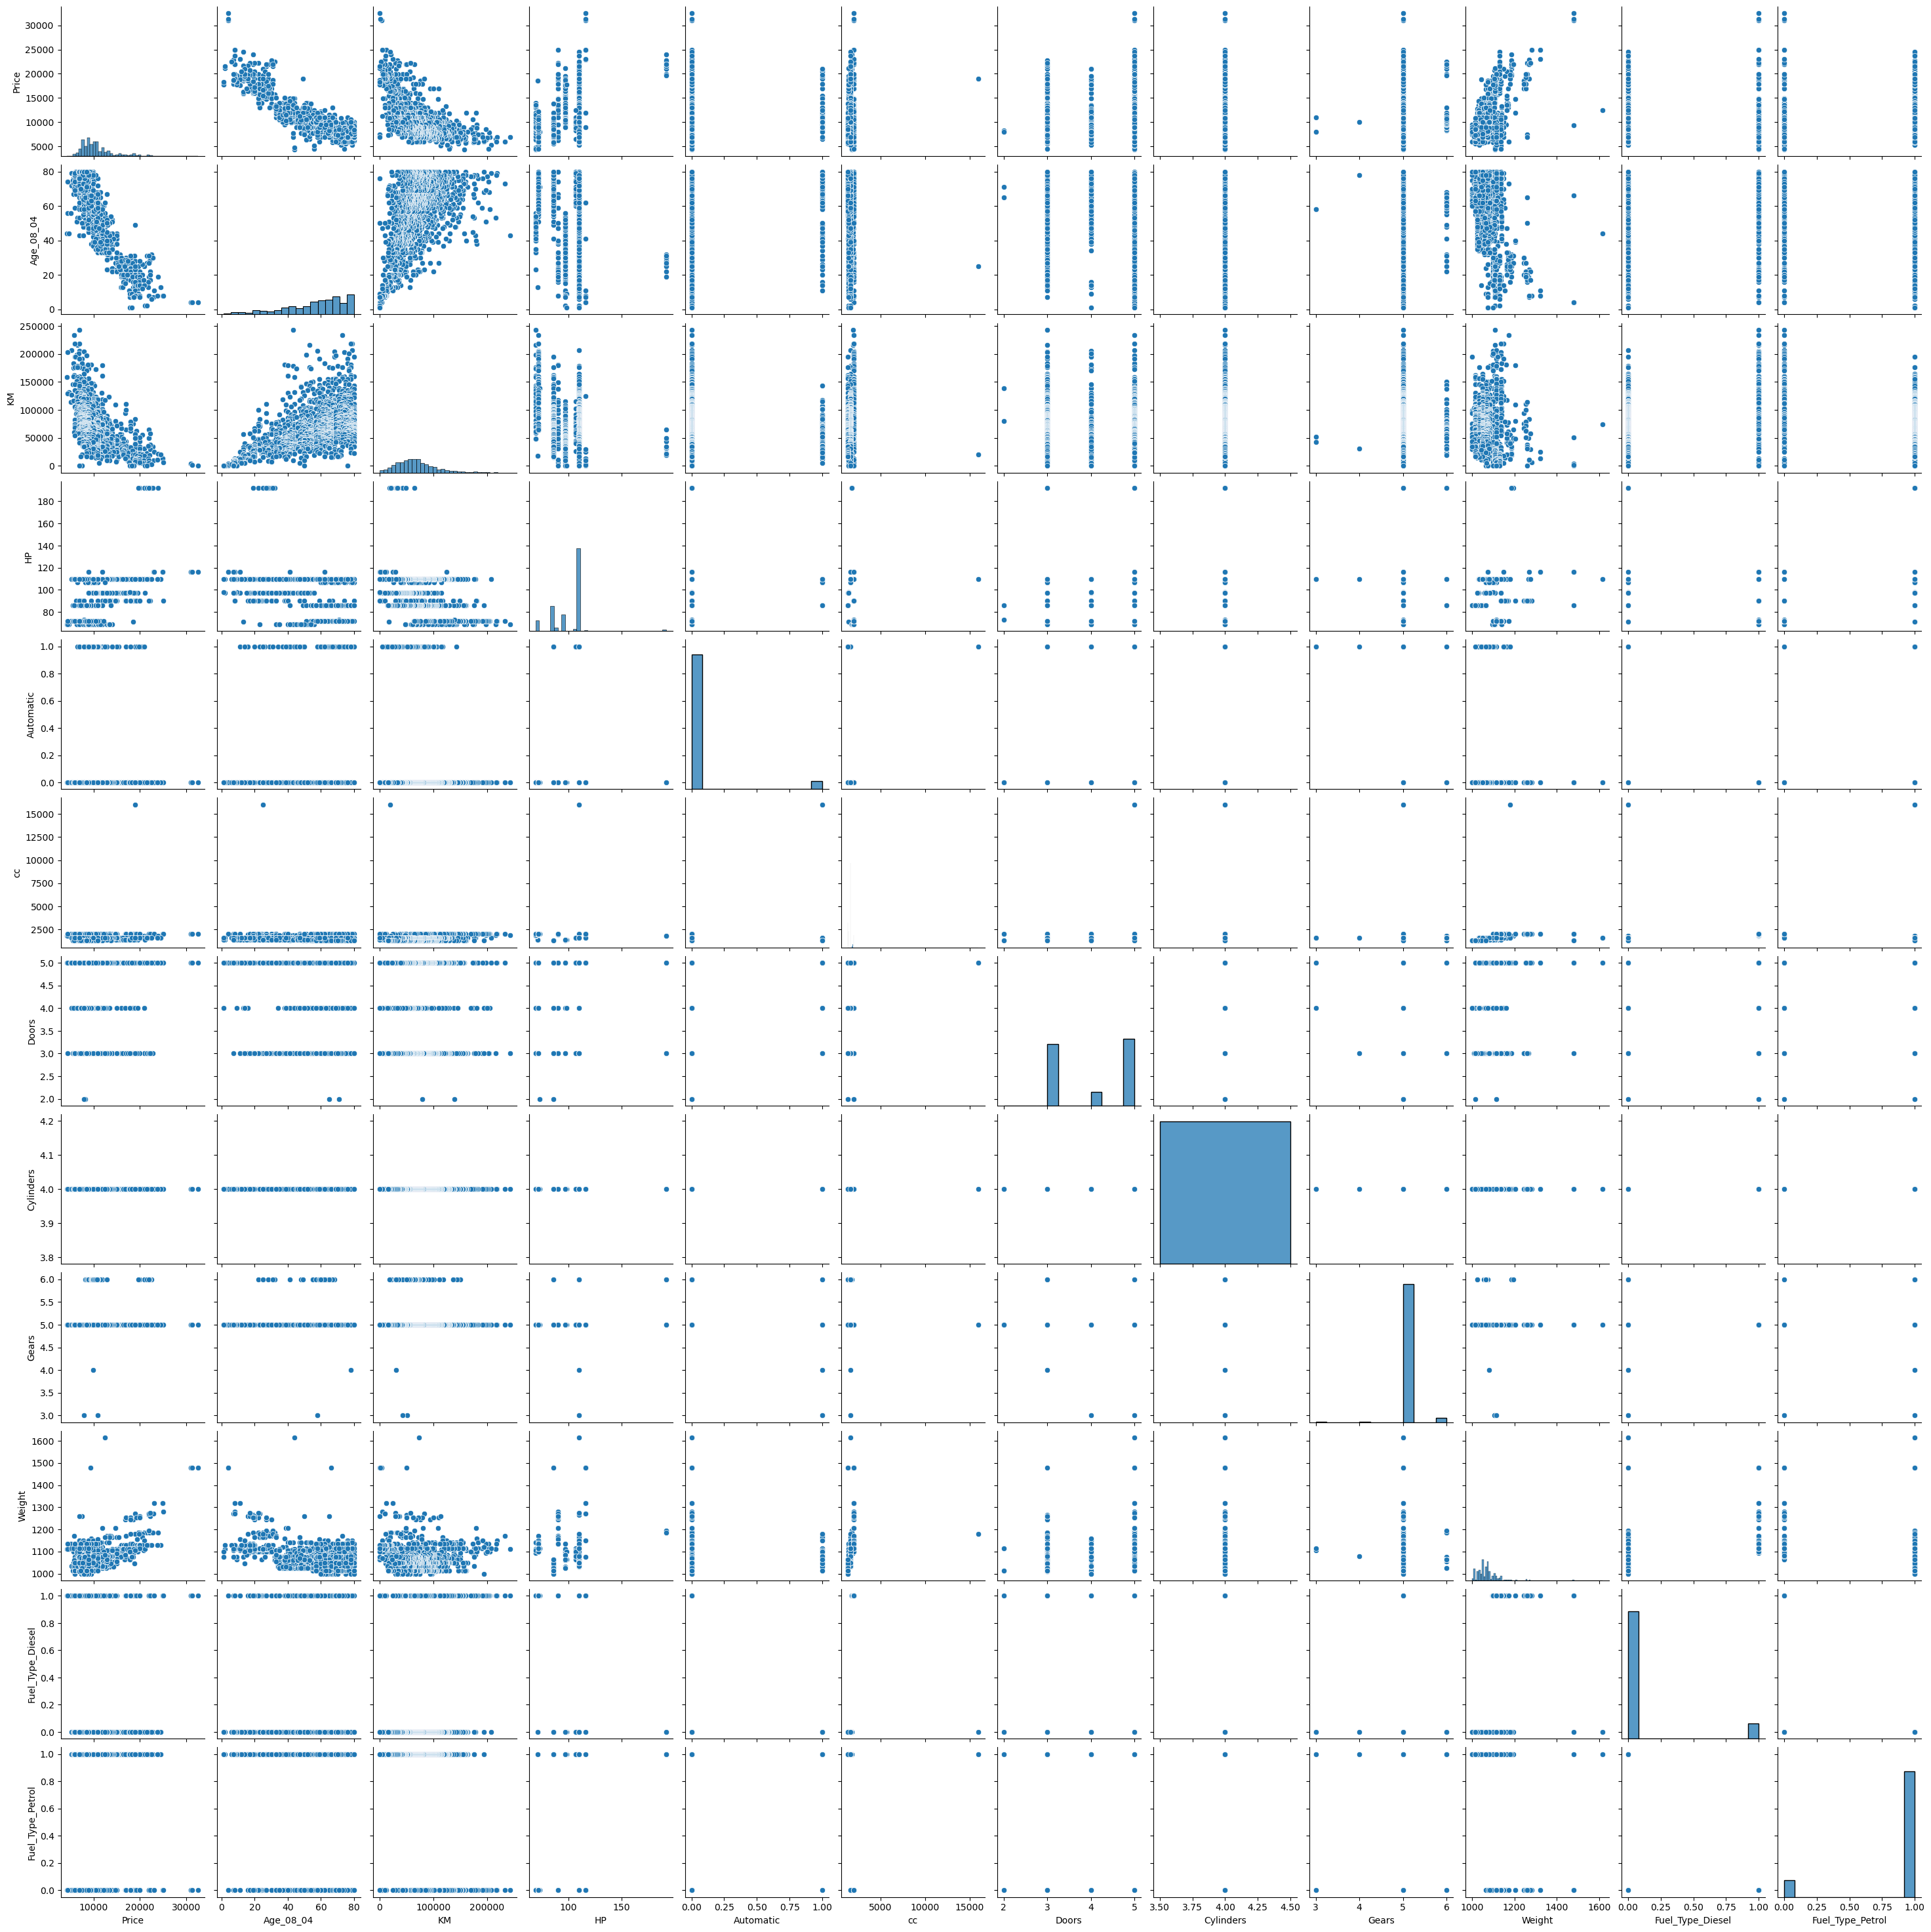

In [14]:
# Performing Correlation To the input variables and output variable.
# visualizing the correlation with pairplot.
sns.pairplot(data)

In [15]:
# Creating Correlation table between the features to check the linearity between the output and input variables.
data.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198,0.054084,-0.038516
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253,-0.097740,0.092611
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598,0.403060,-0.433160
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614,-0.533453,0.489110
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249,-0.084490,0.080249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637,0.327723,-0.315170
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618,0.025495,-0.027589
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613,-0.048847,0.063182
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000,0.568087,-0.560470


## Correlation/pairplot analysis:
From the correlation table and pair plot we can conclude the following :

1. Cylinders features is not impacting the Price.
2. Price is strongly negatively correlated with the age of the vehicle.
3. Price is strongly moderatley correlated with the weight of the vehicle.
4. Price is moderately negatively correlated with the Number of Kilometers driven.
5. Price is moderately positively correlated with the HP
6. Price is lightly positively correlated with the cc,and number of doors.
7. It seems like Price is not dependent on the number of gears and type of fuel.
8. From the correlation table we can also conclude that no other inputs are correlated except weight and fuel type.
9. Vehicle age and KM driven is positively correlated, so build the model with both features and with alternate features and test the accuracy and then finalize the model.
   

In [193]:
X = data.iloc[:,1:]
Y_initial = data.iloc[:,0]
inputs ="+".join(X)

In [17]:
# building the sample model to know how many features are contributing the model.
model1 =smf.ols(f"Price~{inputs}",data=data).fit()

In [18]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     912.3
Date:                Sat, 27 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:05:00   Log-Likelihood:                -12369.
No. Observations:                1436   AIC:                         2.476e+04
Df Residuals:                    1425   BIC:                         2.482e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -580.0605     89.968     -6.447      0.000    -756.544    -403.577
Age_08_04         -123.7771      2.631    -47.043      0.000    -128.938    -118.616
KM                  -0.0175      0.001    -13.154      0.000      -0.020      -0.015
HP                  23.5270      3.575      6.581      0.000      16.515      30.539
Automatic          300.2592    161.026      1.865      0.062     -15.614     616.133
cc                  -0.0556      0.092     -0.604      0.546      -0.236       0.125
Doors              -30.3567     40.908     -0.742      0.458    -110.603      49.890
Cylinders        -2320.2422    359.871     -6.447      0.000   -3026.175   -1614.309
Gears              622.7990    198.026      3.145      0.002     234.346    1011.252
Weight              20.8174      1.218     17.090      0.000      18.428      23.207
Fuel_Type_Diesel   554.0543    382.722      1.448      0.148    -196.704    1304.813
Fuel_Type_Petrol  1144.0966    338.650      3.378      0.001     479.792    1808.402
==============================================================================
Omnibus:                      265.277   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2773.279
Skew:                          -0.532   Prob(JB):                         0.00
Kurtosis:                       9.724   Cond. No.                     6.97e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.8e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Model Analysis:**

From the Above we can interpret that the cc,Doors have hight probability values more than 0.05 so remove those features, and Age , KM together contributing the model performance,  So in the next step remove those features (cc,Doors, Cylinders) and build another model and then compare.

In [ ]:
# Removing cc,Doors,Cylinders.
X_1=X.drop(["Doors","cc","Cylinders"],axis=1)
X_1.info()


In [20]:
# Building another model.
inputs = "+".join(X_1)
inputs

'Age_08_04+KM+HP+Automatic+Gears+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol'

In [21]:
model2 = smf.ols(f"Y~{inputs}",data=data).fit()

In [22]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1141.
Date:                Sat, 27 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:05:01   Log-Likelihood:                -12370.
No. Observations:                1436   AIC:                         2.476e+04
Df Residuals:                    1427   BIC:                         2.481e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -9818.3749   1526.157     -6.433      0.000   -1.28e+04   -6824.623
Age_08_04         -123.7824      2.630    -47.063      0.000    -128.942    -118.623
KM                  -0.0176      0.001    -13.292      0.000      -0.020      -0.015
HP                  23.2717      3.490      6.667      0.000      16.425      30.119
Automatic          303.0552    159.089      1.905      0.057      -9.018     615.128
Gears              653.1577    194.158      3.364      0.001     272.292    1034.024
Weight              20.4840      1.144     17.900      0.000      18.239      22.729
Fuel_Type_Diesel   543.4293    376.995      1.441      0.150    -196.095    1282.954
Fuel_Type_Petrol  1128.8439    337.948      3.340      0.001     465.915    1791.773
==============================================================================
Omnibus:                      252.925   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2550.627
Skew:                          -0.498   Prob(JB):                         0.00
Kurtosis:                       9.453   Cond. No.                     3.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

By comparing model1 and model2 there are no much difference .

Try to build another model by handling the outliers.

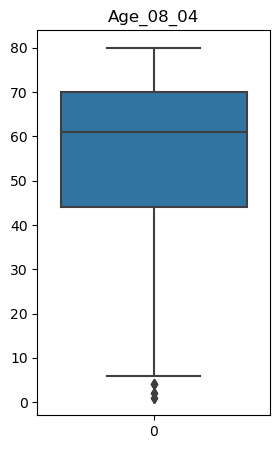

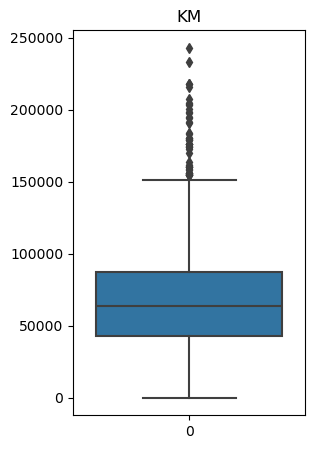

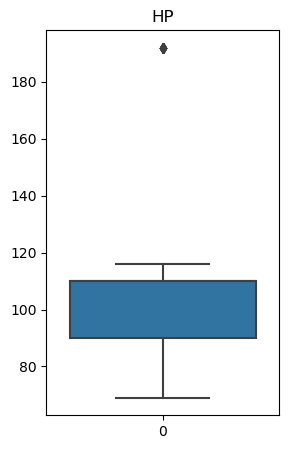

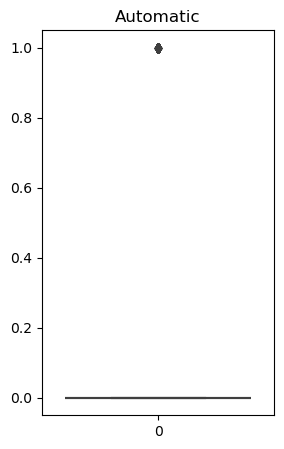

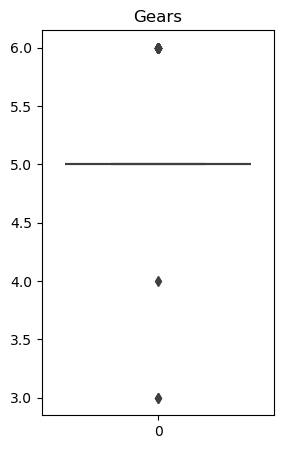

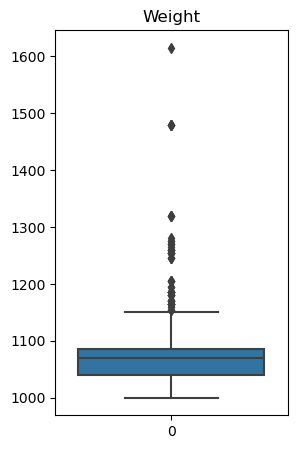

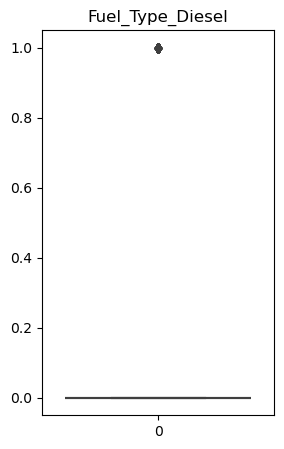

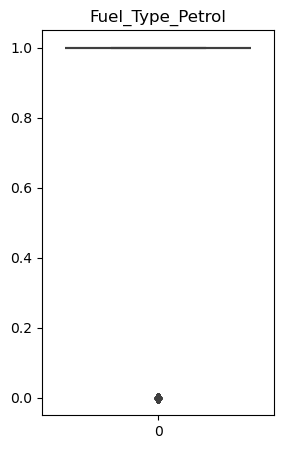

In [23]:
# finding the outliers.
for column in X_1.columns:
    plt.figure(figsize=(3,5))
    sns.boxplot(X_1[column])
    plt.title(column)
    plt.show()

from the boxplots there are outliers in KM and it seems like that outliers are present with a valid reason,like overusage, age of the vehicle like this so these outliers are not treated.

In [179]:
#  Normalize the data and then build the model
def Normalize(x):
    return ((x-x.min())/(x.max()-x.min()))

norm_df = Normalize(data)

In [180]:
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             1436 non-null   float64
 1   Age_08_04         1436 non-null   float64
 2   KM                1436 non-null   float64
 3   HP                1436 non-null   float64
 4   Automatic         1436 non-null   float64
 5   cc                1436 non-null   float64
 6   Doors             1436 non-null   float64
 7   Cylinders         0 non-null      float64
 8   Gears             1436 non-null   float64
 9   Weight            1436 non-null   float64
 10  Fuel_Type_Diesel  1436 non-null   float64
 11  Fuel_Type_Petrol  1436 non-null   float64
dtypes: float64(12)
memory usage: 134.8 KB


In [27]:
X = norm_df.iloc[:,]
Y = norm_df.iloc[:,0]


In [28]:
X_2=X.drop(["Doors","cc","Cylinders"],axis=1)
inputs = "+".join(X_2.columns)
inputs

'Price+Age_08_04+KM+HP+Automatic+Gears+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol'

In [29]:
model3 = smf.ols(f"Y~{inputs}",data=norm_df).fit()

In [30]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.428e+30
Date:                Sat, 27 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:05:02   Log-Likelihood:                 47935.
No. Observations:                1436   AIC:                        -9.585e+04
Df Residuals:                    1426   BIC:                        -9.580e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         8.188e-16   3.36e-16      2.435      0.015    1.59e-16    1.48e-15
Price                1.0000   4.31e-16   2.32e+15      0.000       1.000       1.000
Age_08_04        -3.608e-16   1.92e-16     -1.880      0.060   -7.37e-16    1.56e-17
KM                3.365e-16   1.98e-16      1.704      0.089    -5.1e-17    7.24e-16
HP                1.422e-16   2.52e-16      0.564      0.573   -3.52e-16    6.37e-16
Automatic         1.908e-16   9.21e-17      2.072      0.038    1.02e-17    3.71e-16
Gears             6.939e-17   3.38e-16      0.205      0.837   -5.94e-16    7.33e-16
Weight           -3.123e-16    4.5e-16     -0.693      0.488    -1.2e-15    5.71e-16
Fuel_Type_Diesel -1.796e-16   2.18e-16     -0.823      0.411   -6.07e-16    2.48e-16
Fuel_Type_Petrol -1.738e-16   1.96e-16     -0.886      0.376   -5.59e-16    2.11e-16
==============================================================================
Omnibus:                      121.500   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.018
Skew:                          -0.791   Prob(JB):                     9.76e-34
Kurtosis:                       3.187   Cond. No.                         47.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By comparing this model3 with model2 there is no much difference between the models so lets test /validate the model with different approaches, and finalize the model.


In [31]:
# split the data into training data and test data.
norm_df1 = norm_df.drop(["Doors","cc","Cylinders"],axis=1)

In [32]:
norm_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             1436 non-null   float64
 1   Age_08_04         1436 non-null   float64
 2   KM                1436 non-null   float64
 3   HP                1436 non-null   float64
 4   Automatic         1436 non-null   float64
 5   Gears             1436 non-null   float64
 6   Weight            1436 non-null   float64
 7   Fuel_Type_Diesel  1436 non-null   float64
 8   Fuel_Type_Petrol  1436 non-null   float64
dtypes: float64(9)
memory usage: 101.1 KB


In [33]:
X= norm_df1.iloc[:,1:]
Y=norm_df1.iloc[:,0]

In [34]:
X.info(),Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age_08_04         1436 non-null   float64
 1   KM                1436 non-null   float64
 2   HP                1436 non-null   float64
 3   Automatic         1436 non-null   float64
 4   Gears             1436 non-null   float64
 5   Weight            1436 non-null   float64
 6   Fuel_Type_Diesel  1436 non-null   float64
 7   Fuel_Type_Petrol  1436 non-null   float64
dtypes: float64(8)
memory usage: 89.9 KB
<class 'pandas.core.series.Series'>
RangeIndex: 1436 entries, 0 to 1435
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
1436 non-null   float64
dtypes: float64(1)
memory usage: 11.3 KB


(None, None)

In [35]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=7)

In [36]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1148 entries, 1337 to 175
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age_08_04         1148 non-null   float64
 1   KM                1148 non-null   float64
 2   HP                1148 non-null   float64
 3   Automatic         1148 non-null   float64
 4   Gears             1148 non-null   float64
 5   Weight            1148 non-null   float64
 6   Fuel_Type_Diesel  1148 non-null   float64
 7   Fuel_Type_Petrol  1148 non-null   float64
dtypes: float64(8)
memory usage: 80.7 KB


In [37]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 635 to 283
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age_08_04         288 non-null    float64
 1   KM                288 non-null    float64
 2   HP                288 non-null    float64
 3   Automatic         288 non-null    float64
 4   Gears             288 non-null    float64
 5   Weight            288 non-null    float64
 6   Fuel_Type_Diesel  288 non-null    float64
 7   Fuel_Type_Petrol  288 non-null    float64
dtypes: float64(8)
memory usage: 20.2 KB


In [38]:
train_y.info()

<class 'pandas.core.series.Series'>
Index: 1148 entries, 1337 to 175
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
1148 non-null   float64
dtypes: float64(1)
memory usage: 17.9 KB


In [39]:
test_y.info()

<class 'pandas.core.series.Series'>
Index: 288 entries, 635 to 283
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
288 non-null    float64
dtypes: float64(1)
memory usage: 4.5 KB


In [40]:
inputs ="+".join(train_x)

In [41]:
train_data = pd.concat([train_x,train_y],axis=1)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1148 entries, 1337 to 175
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age_08_04         1148 non-null   float64
 1   KM                1148 non-null   float64
 2   HP                1148 non-null   float64
 3   Automatic         1148 non-null   float64
 4   Gears             1148 non-null   float64
 5   Weight            1148 non-null   float64
 6   Fuel_Type_Diesel  1148 non-null   float64
 7   Fuel_Type_Petrol  1148 non-null   float64
 8   Price             1148 non-null   float64
dtypes: float64(9)
memory usage: 89.7 KB


In [42]:
train_data.head()

,Age_08_04,KM,HP,Automatic,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol,Price
1337,0.936709,0.261865,0.333333,0.0,0.666667,0.056911,0.0,1.0,0.156306
1058,0.962025,0.711851,0.024390,0.0,0.666667,0.219512,1.0,0.0,0.218472
1241,0.886076,0.337446,0.333333,0.0,0.666667,0.121951,0.0,1.0,0.163410
665,0.784810,0.449504,0.333333,0.0,0.666667,0.081301,0.0,1.0,0.120782
109,0.037975,0.000000,0.382114,0.0,0.666667,0.780488,1.0,0.0,1.000000


In [43]:
# Building the model with train data
model4 = smf.ols(f"train_y~{inputs}",data=train_data).fit()

In [44]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                train_y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     855.1
Date:                Sat, 27 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:05:03   Log-Likelihood:                 1859.0
No. Observations:                1148   AIC:                            -3700.
Df Residuals:                    1139   BIC:                            -3655.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3597      0.022     16.713      0.000       0.317       0.402
Age_08_04           -0.3573      0.008    -42.719      0.000      -0.374      -0.341
KM                  -0.1452      0.013    -11.072      0.000      -0.171      -0.119
HP                   0.1083      0.017      6.259      0.000       0.074       0.142
Automatic            0.0152      0.007      2.330      0.020       0.002       0.028
Gears                0.0774      0.024      3.238      0.001       0.030       0.124
Weight               0.3854      0.028     13.833      0.000       0.331       0.440
Fuel_Type_Diesel     0.0133      0.016      0.836      0.403      -0.018       0.044
Fuel_Type_Petrol     0.0315      0.014      2.200      0.028       0.003       0.060
==============================================================================
Omnibus:                      153.092   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1354.557
Skew:                          -0.268   Prob(JB):                    7.27e-295
Kurtosis:                       8.294   Cond. No.                         38.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
model4.resid.mean()

2.4303052795148243e-16

Mean of the errors is zero.

In [46]:
# Finding the mean square error for the both train and test data.
train_pred = model4.predict(train_x)
test_pred = model4.predict(test_x)

In [47]:
mse_train = mean_squared_error(train_y,train_pred)
r2_train = r2_score(train_y,train_pred)

In [48]:
mse_train.round(5),r2_train.round(5)

(0.0023, 0.85727)

In [49]:
mse_test = mean_squared_error(test_y,test_pred)
r2_test = r2_score(test_y,test_pred)

In [50]:
mse_test.round(5),r2_test.round(5)

(0.00212, 0.88592)

## Comparing the mean_square_error and r2_score values for the test and train_data

mse_train = 0.0023 

mse_test  = 0.00212

mse value of test and train is approximately equal ,so the model is accurate and performing well, the model is generalized the inputs rather memorizing it.

r2_train = 0.85727

r2_test = 0.88592

r2_trian and r2_test is nearly equal and both are very close to 1 , hence it is a good model that is generalizing the data rather memorizing it, so the model is a good fit model.

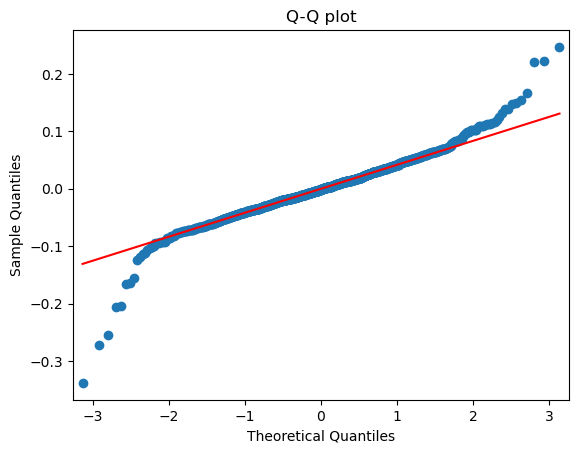

In [51]:
# Q-Q plot to test the normality of the errors.
import  statsmodels.api as sm
qqplot= sm.qqplot(model4.resid,line='q')
plt.title("Q-Q plot")
plt.show()

From the qq-plot we can analyze that almost all the values are linearly spreaded except very few values at the beginning and ending.

In [52]:
# Residual plot for Homoscedasticity.
def get_stand(x):
    return ((x-x.mean())/x.std())

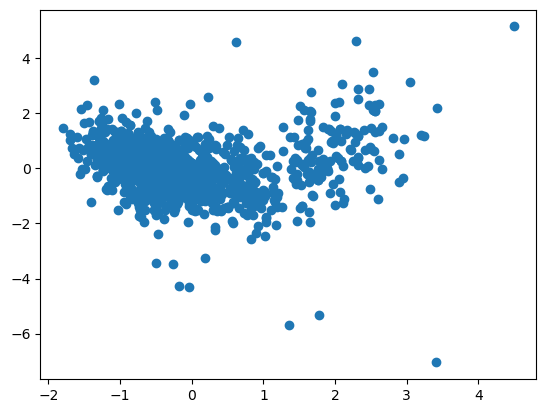

In [53]:
plt.scatter(get_stand(model4.fittedvalues),get_stand(model4.resid))

From the residual plot we can analyze that the  errors has almost homo scedasticity except few points.

<StemContainer object of 3 artists>

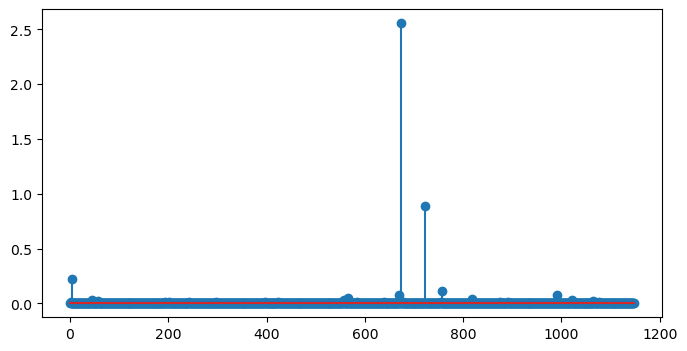

In [54]:
# Cooks distance plot , to detect the high influence points (outliers)
model_influence = model4.get_influence()
(c,_)=model_influence.cooks_distance
fig=plt.figure(figsize=(8,4))
plt.stem(np.arange(len(train_x)),np.round(c,3))

From the cooks distance plot we can analyse that only one variable is highly influencing and another is slightly influencing the model so try to build another model by deleting those values.

In [55]:
np.argmax(c),np.max(c)

(673, 2.555881994812168)

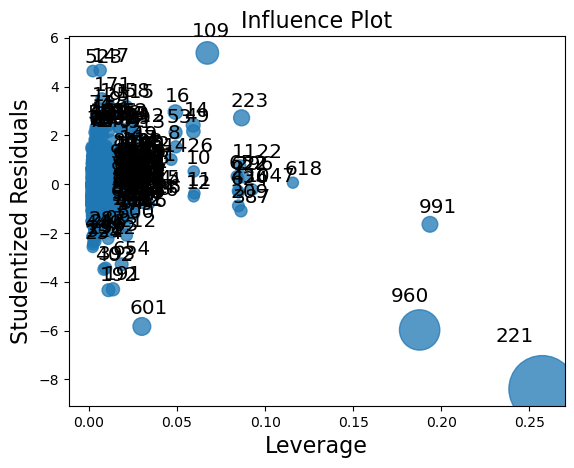

In [56]:
# High influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model4)
plt.show()

from this high influence plot we can predict that index number 221 and 960 has high influence on the model so delete those records and then build another model.


In [57]:
# Leverage value.
k = train_data.shape[1]
n = train_data.shape[0]

leverage_cutoff = (3*(k+1)/n)

In [58]:
influence = model4.get_influence()
leverage = influence.hat_matrix_diag
outliers = np.where(leverage>leverage_cutoff)[0]

In [59]:
outliers

array([   4,   36,   45,   91,   98,  231,  239,  242,  297,  336,  408,
        424,  479,  486,  509,  566,  627,  639,  656,  669,  673,  723,
        732,  745,  752,  753,  756,  801,  815,  817,  907,  940,  947,
        967,  986,  992, 1022, 1066], dtype=int64)

In [60]:
len(outliers)

38

from the leverage cutofff we have 38 records that are more than the leverage cutoff value. so try to treat them or else remove those values because there are almost 1200 values so 38 is a small number so we can remove those and build new model.

In [61]:
# deleting the outliers.
# remove the outliers : 673,221,960
cleaned_train_data = train_data.drop(index=[673,221,960])

In [62]:
cleaned_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1145 entries, 1337 to 175
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age_08_04         1145 non-null   float64
 1   KM                1145 non-null   float64
 2   HP                1145 non-null   float64
 3   Automatic         1145 non-null   float64
 4   Gears             1145 non-null   float64
 5   Weight            1145 non-null   float64
 6   Fuel_Type_Diesel  1145 non-null   float64
 7   Fuel_Type_Petrol  1145 non-null   float64
 8   Price             1145 non-null   float64
dtypes: float64(9)
memory usage: 89.5 KB


In [63]:
# the fuel type is also not contributing the Price, its probability value is more 
# 0.05 so drop the fuel column and build the another model.

train_x = cleaned_train_data.iloc[:,[0,1,2,3,4,5]]

In [64]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1145 entries, 1337 to 175
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age_08_04  1145 non-null   float64
 1   KM         1145 non-null   float64
 2   HP         1145 non-null   float64
 3   Automatic  1145 non-null   float64
 4   Gears      1145 non-null   float64
 5   Weight     1145 non-null   float64
dtypes: float64(6)
memory usage: 62.6 KB


In [65]:
train_y = cleaned_train_data.iloc[:,8]

In [66]:
train_y.info()

<class 'pandas.core.series.Series'>
Index: 1145 entries, 1337 to 175
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
1145 non-null   float64
dtypes: float64(1)
memory usage: 17.9 KB


In [67]:
inputs = "+".join(train_x)
model5 = smf.ols(f"train_y~{inputs}",data= cleaned_train_data).fit()

In [68]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                train_y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1228.
Date:                Sat, 27 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:05:07   Log-Likelihood:                 1889.9
No. Observations:                1145   AIC:                            -3766.
Df Residuals:                    1138   BIC:                            -3730.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3732      0.016     22.817      0.000       0.341       0.405
Age_08_04     -0.3357      0.008    -40.002      0.000      -0.352      -0.319
KM            -0.1770      0.012    -14.934      0.000      -0.200      -0.154
HP             0.1229      0.013      9.806      0.000       0.098       0.148
Automatic      0.0131      0.006      2.087      0.037       0.001       0.025
Gears          0.0777      0.023      3.374      0.001       0.033       0.123
Weight         0.4386      0.022     19.898      0.000       0.395       0.482
==============================================================================
Omnibus:                      102.540   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              602.201
Skew:                          -0.112   Prob(JB):                    1.71e-131
Kurtosis:                       6.546   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
model5.resid.mean()

3.3355172093541824e-17

In [70]:

test_x = test_x.drop(["Fuel_Type_Diesel","Fuel_Type_Petrol"],axis=1)


In [71]:
train_data =pd.concat([train_x,train_y],axis=1)
test_y = test_y.rename("Price")
test_data = pd.concat([test_x,test_y],axis=1)

In [72]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1145 entries, 1337 to 175
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age_08_04  1145 non-null   float64
 1   KM         1145 non-null   float64
 2   HP         1145 non-null   float64
 3   Automatic  1145 non-null   float64
 4   Gears      1145 non-null   float64
 5   Weight     1145 non-null   float64
 6   Price      1145 non-null   float64
dtypes: float64(7)
memory usage: 71.6 KB


In [73]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 635 to 283
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age_08_04  288 non-null    float64
 1   KM         288 non-null    float64
 2   HP         288 non-null    float64
 3   Automatic  288 non-null    float64
 4   Gears      288 non-null    float64
 5   Weight     288 non-null    float64
 6   Price      288 non-null    float64
dtypes: float64(7)
memory usage: 18.0 KB


In [74]:
# Comparing MSE and R2_Score of train and test data.
train_pred1 = model5.predict(train_x)
test_pred1 = model5.predict(test_x)

In [75]:
mse_train_y = mean_squared_error(train_y,train_pred1)

In [76]:
x = r2_score(train_y,train_pred1)

In [77]:
r2_train_y = x

In [78]:
mse_test_y = mean_squared_error(test_y,test_pred1)
r2_test_y = r2_score(test_y,test_pred1)

In [79]:
mse_train_y,mse_test_y

(0.002157207819338818, 0.001953146542908851)

In [80]:
r2_train_y,r2_test_y

(0.8661933824265133, 0.894806869980827)

**hence the mse and r2 values are good and the model is a good fit model.**

So finalize the model by combining the test and train data together.

In [81]:
final_data = pd.concat([train_data,test_data],axis=0)

In [82]:
final_data.head()

,Age_08_04,KM,HP,Automatic,Gears,Weight,Price
1337,0.936709,0.261865,0.333333,0.0,0.666667,0.056911,0.156306
1058,0.962025,0.711851,0.024390,0.0,0.666667,0.219512,0.218472
1241,0.886076,0.337446,0.333333,0.0,0.666667,0.121951,0.163410
665,0.784810,0.449504,0.333333,0.0,0.666667,0.081301,0.120782
109,0.037975,0.000000,0.382114,0.0,0.666667,0.780488,1.000000


In [83]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1433 entries, 1337 to 283
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age_08_04  1433 non-null   float64
 1   KM         1433 non-null   float64
 2   HP         1433 non-null   float64
 3   Automatic  1433 non-null   float64
 4   Gears      1433 non-null   float64
 5   Weight     1433 non-null   float64
 6   Price      1433 non-null   float64
dtypes: float64(7)
memory usage: 89.6 KB


In [84]:
final_data.reset_index(inplace=True)

In [85]:
final_data.head()

,index,Age_08_04,KM,HP,Automatic,Gears,Weight,Price
0,1337,0.936709,0.261865,0.333333,0.0,0.666667,0.056911,0.156306
1,1058,0.962025,0.711851,0.024390,0.0,0.666667,0.219512,0.218472
2,1241,0.886076,0.337446,0.333333,0.0,0.666667,0.121951,0.163410
3,665,0.784810,0.449504,0.333333,0.0,0.666667,0.081301,0.120782
4,109,0.037975,0.000000,0.382114,0.0,0.666667,0.780488,1.000000


In [86]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      1433 non-null   int64  
 1   Age_08_04  1433 non-null   float64
 2   KM         1433 non-null   float64
 3   HP         1433 non-null   float64
 4   Automatic  1433 non-null   float64
 5   Gears      1433 non-null   float64
 6   Weight     1433 non-null   float64
 7   Price      1433 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 89.7 KB


In [87]:
final_data.drop("index",axis=1,inplace=True)

In [88]:
final_data.describe()

,Age_08_04,KM,HP,Automatic,Gears,Weight,Price
count,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000
mean,0.695452,0.281960,0.264372,0.055827,0.675506,0.116802,0.226700
std,0.235602,0.154448,0.121820,0.229667,0.062901,0.080534,0.128955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.544304,0.176951,0.170732,0.000000,0.666667,0.065041,0.145648
50%,0.759494,0.260606,0.333333,0.000000,0.666667,0.113821,0.197158
75%,0.873418,0.358022,0.333333,0.000000,0.666667,0.138211,0.269982
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.780488,1.000000


In [89]:
final_data.tail()

,Age_08_04,KM,HP,Automatic,Gears,Weight,Price
1428,0.620253,0.340759,0.333333,0.0,0.666667,0.065041,0.278863
1429,0.822785,0.194388,0.333333,0.0,0.666667,0.081301,0.182948
1430,0.696203,0.186565,0.333333,0.0,0.666667,0.130081,0.289520
1431,0.772152,0.251639,0.138211,0.0,0.666667,0.065041,0.191829
1432,0.493671,0.187651,0.333333,1.0,0.666667,0.170732,0.341030


In [90]:
X = final_data.iloc[:,:6]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age_08_04  1433 non-null   float64
 1   KM         1433 non-null   float64
 2   HP         1433 non-null   float64
 3   Automatic  1433 non-null   float64
 4   Gears      1433 non-null   float64
 5   Weight     1433 non-null   float64
dtypes: float64(6)
memory usage: 67.3 KB


In [91]:
Y = final_data.iloc[:,6]

In [92]:
inputs = "+".join(X.columns)

In [93]:
inputs

'Age_08_04+KM+HP+Automatic+Gears+Weight'

In [94]:
# building final model 

Final_Model = smf.ols(f"Y~{inputs}",data=final_data).fit()

In [95]:
Final_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1636.
Date:                Sat, 27 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:05:08   Log-Likelihood:                 2381.6
No. Observations:                1433   AIC:                            -4749.
Df Residuals:                    1426   BIC:                            -4712.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3711      0.014     26.124      0.000       0.343       0.399
Age_08_04     -0.3276      0.007    -44.644      0.000      -0.342      -0.313
KM            -0.1845      0.010    -18.005      0.000      -0.205      -0.164
HP             0.1179      0.011     10.753      0.000       0.096       0.139
Automatic      0.0094      0.005      1.743      0.082      -0.001       0.020
Gears          0.0707      0.020      3.540      0.000       0.032       0.110
Weight         0.4798      0.019     25.840      0.000       0.443       0.516
==============================================================================
Omnibus:                      123.138   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              650.051
Skew:                          -0.181   Prob(JB):                    6.97e-142
Kurtosis:                       6.280   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
prediction = Final_Model.predict(X)

In [97]:
mse = mean_squared_error(Y,prediction)

In [98]:
r2 = r2_score(Y,prediction)

In [99]:
r2,mse

(0.8731272256246818, 0.0021083568720210526)

Hence the mse and r2_score values are satisfactory so we can finalize the final model.

Lets check once with the Lasso and Rdige regressions and finalize the model.





## Lasso Regression: 
It shrinks some coefficients to exactly zero, effectively performing feature selectin by excluding some features from the model.

It is useful when we expect that many features are irrelevant and can be excluded from the model.

pelanty Term = L1




In [101]:
#take the normalized dataset where all the features are present.
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             1436 non-null   float64
 1   Age_08_04         1436 non-null   float64
 2   KM                1436 non-null   float64
 3   HP                1436 non-null   float64
 4   Automatic         1436 non-null   float64
 5   cc                1436 non-null   float64
 6   Doors             1436 non-null   float64
 7   Cylinders         0 non-null      float64
 8   Gears             1436 non-null   float64
 9   Weight            1436 non-null   float64
 10  Fuel_Type_Diesel  1436 non-null   float64
 11  Fuel_Type_Petrol  1436 non-null   float64
dtypes: float64(12)
memory usage: 134.8 KB


In [109]:
norm_df.drop("Cylinders",axis=1,inplace=True)
X = norm_df.iloc[:,1:]
Y = norm_df.iloc[:,0]

In [110]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=7)

In [111]:
train_x.isnull().sum()

Age_08_04           0
KM                  0
HP                  0
Automatic           0
cc                  0
Doors               0
Gears               0
Weight              0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
dtype: int64

In [112]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1.0)
lasso.fit(train_x,train_y)

Lasso()

In [113]:
y_pred = lasso.predict(test_x)

In [121]:
lasso_mse = mean_squared_error(test_y,y_pred)

In [123]:
r2_lasso = r2_score(test_y,y_pred)

In [125]:
r2_lasso  

-0.0015538436275635004

In [127]:
# hence lasso method is not giving the accurate model the r2 score is almost zero so don't consider this model.

## Ridge Regression:

The L2 penalty shrinks coefficients but does not set any of them to zero, so all features are remain in the model.

Ridge is useful when all features are expected to be relevant but need regularization to prevent overfitting.


In [128]:
# importing the Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(train_x,train_y)


Ridge(alpha=1)

In [129]:
ridge_y_pred = ridge.predict(test_x)

In [137]:
ridge_mse = mean_squared_error(test_y,ridge_y_pred)

In [147]:
r2_ridge=r2_score(test_y,ridge_y_pred)

In [148]:
ridge_mse

0.0023154348820735877

In [149]:
r2_ridge

0.875294640084637

In [152]:
# hence the r2 values of the both multinear model and ridge model is same so consider the finalized model as the final model.

# Final Model

In [154]:
Final_Model

In [216]:
# SAVING THE FINAL MODEL TO DISK.



In [ ]:
X_1.drop(["Fuel_Type_Diesel","Fuel_Type_Petrol"],axis=1,inplace=True)
inputs = "+".join(X_1.columns)
inputs

In [199]:
X_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age_08_04  1436 non-null   int64
 1   KM         1436 non-null   int64
 2   HP         1436 non-null   int64
 3   Automatic  1436 non-null   int64
 4   Gears      1436 non-null   int64
 5   Weight     1436 non-null   int64
dtypes: int64(6)
memory usage: 67.4 KB


In [201]:
df = pd.concat([X_1,Y_initial],axis=1)
features = "+".join(X_1)

In [210]:
final_Model2 = smf.ols(f"Y_initial~{features}",data=df).fit()

In [211]:
prediction = final_Model2.predict(X_1)

In [212]:
r2_value =r2_score(Y_initial,prediction)

In [213]:
r2_value

0.8633142324720767

In [214]:
inputs={
    "Age_08_04":78,
    "KM":30964,
    "HP":110,
    "Automatic":1,
    "Gears":4,
    "Weight":1080
}

inputs_df = pd.DataFrame([inputs])

In [218]:
final_Model2.predict(inputs_df)

0    8786.221567
dtype: float64

In [219]:
# final model = final_Model2

In [220]:
#saving the model
import pickle
filename = "final_Model.pkl"
pickle.dump(Final_Model,open(filename,"wb"))

# 
Interview Question

**1. what is Normalization and Standardization and how is it helpful ?**

**Normalization:**

The process of replacing the values in a dataset with its normalized values is called as normalization.

The values range if from 0 to 1

whenever the categorical data is present in the dataset then this method is used.

normalized value (x) = (X - X.min())/(X.max()-X.min())


**Standardization:**

The process of repacing the values in a dataset with the Z-score values is called as standardization .

The values range is from -3.4 to 3.4

When there are no categorical data present in the dataset then this method is used.

standard value (x) = (X - X.mean()/X.std())


**Usecase**

Both the methods are used to make the dataset scale free and unit free. because the machine learning algorithms are scale sensitive , for this case the Normalization and standardization is used.


**2. What techniques can be used to address multicollinearity in multiple linear regression?**

Multicollinearity in multiple linear regressin can lead to unreliable estimates of regression coefficients and standard errors. the following are the several techniques to address the multicollinearity.

1. Removing Highly Correlated  predictors.
2. Future engineering.
3. future selection.
4. Ridge Regression.
5. lasso regression.
6. Variance inflation Factor(VIF).
7. Using the Domain Knowledge for analyzing the features.
8. Principal Component Analysis(PCA),dimensionality reduction techniques.